In [1]:
import pandas as pd

pd.set_option('display.max_columns', 50)

from sklearn.experimental import enable_hist_gradient_boosting

%matplotlib inline
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.svm import *
from sklearn.neural_network import *
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('data_filtered.csv', index_col = 0)

In [3]:
data.isnull().sum().apply(lambda x: x/data.shape[0]*100)

CHROM                  0.000000
POS                    0.000000
REF                    0.000000
ALT                    0.000000
CLNDN                  0.000000
ORIGIN                 0.000000
CLASS                  0.000000
Consequence            0.000000
IMPACT                 0.000000
SYMBOL                 0.000000
Feature                0.000000
CDS_position          14.387078
Amino_acids           14.387078
STRAND                 0.000000
SIFT                  59.500376
PolyPhen               0.000000
LoFtool                6.359742
CADD_PHRED             0.000000
BLOSUM62              58.287284
Amino_acids_target    14.387078
AF                     0.000000
IS_EXON                0.000000
EXON_INTRON            0.000000
dtype: float64

In [4]:
data

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,BLOSUM62,Amino_acids_target,AF,IS_EXON,EXON_INTRON
0,1,1168180,G,C,['not_specified'],1,0,['missense_variant'],MODERATE,B3GALT6,NM_080605.3,0.033481,E,1.0,tolerated,benign,NaN,1.053,2.0,D,0.10020,True,1.000000
1,1,1470752,G,A,"['Spinocerebellar_ataxia_21', 'not_provided']",1,0,['missense_variant'],MODERATE,TMEM240,NM_001114748.1,0.032646,P,-1.0,deleterious_low_confidence,benign,NaN,31.000,-3.0,L,0.00000,True,1.000000
2,1,1737942,A,G,"['Strabismus', 'Nystagmus', 'Hypothyroidism', ...",35,1,"['missense_variant', '5_prime_UTR_variant']",MODERATE,GNB1,NM_002074.4,0.015295,I,-1.0,deleterious,probably_damaging,NaN,28.100,-1.0,T,0.00000,True,0.500000
3,1,2160305,G,A,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,NaN,unknown,NaN,22.500,NaN,S,0.00000,True,0.142857
4,1,2160305,G,T,"['Shprintzen', 'Goldberg_syndrome']",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,NaN,unknown,NaN,24.700,-3.0,C,0.00000,True,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,"['Hereditary_factor_VIII_deficiency_disease', ...",1,0,['synonymous_variant'],LOW,F8,NM_000132.3,0.354794,S,-1.0,NaN,unknown,0.00158,0.105,NaN,*,0.13923,True,0.538462
65184,X,154159118,C,T,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,1,['missense_variant'],MODERATE,F8,NM_000132.3,0.270573,V,-1.0,tolerated,benign,0.00158,0.002,3.0,I,0.00130,True,0.538462
65185,X,154194886,C,T,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,0,['synonymous_variant'],LOW,F8,NM_000132.3,0.099651,A,-1.0,NaN,unknown,0.00158,12.850,NaN,*,0.01110,True,0.307692
65186,X,154490187,T,C,"['Non', 'syndromic_X', 'linked_intellectual_di...",1,0,['synonymous_variant'],LOW,RAB39B,NM_171998.2,0.049780,T,-1.0,NaN,unknown,NaN,0.130,NaN,*,0.00030,True,1.000000


Tenemos cuatro grupos a tratar (LoFtool), (CDS_position, Amino_acids, Amino_acids_target), (SIFT), (BLODSUM62).

Estudiaremos primero (CDS_position, Amino_acids, Amino_acids_target).

In [5]:
data["CDS_position"].isna().eq(data["Amino_acids"].isna()).all()

True

In [6]:
data[data["Amino_acids"].isna()].head(25)

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,BLOSUM62,Amino_acids_target,AF,IS_EXON,EXON_INTRON
1226,3,38655243,C,T,"['Brugada_syndrome', 'not_specified', 'Brugada...",1,1,"['intron_variant', 'missense_variant']",MODIFIER,SCN5A,NM_001099404.1,NaN,NaN,-1.0,NaN,unknown,0.000413,20.700,NaN,NaN,0.00031,False,0.222222
1227,3,38655260,G,A,"['Brugada_syndrome', 'not_specified']",1,1,"['intron_variant', 'missense_variant']",MODIFIER,SCN5A,NM_001099404.1,NaN,NaN,-1.0,NaN,unknown,0.000413,19.410,NaN,NaN,0.00000,False,0.222222
1228,3,38655264,G,A,"['Cardiac_conduction_defect', '_nonspecific', ...",1,1,"['intron_variant', 'missense_variant']",MODIFIER,SCN5A,NM_001099404.1,NaN,NaN,-1.0,NaN,unknown,0.000413,18.780,NaN,NaN,0.00001,False,0.222222
1229,3,38655272,C,T,"['Primary_dilated_cardiomyopathy', 'Congenital...",1,0,"['intron_variant', 'missense_variant']",MODIFIER,SCN5A,NM_001099404.1,NaN,NaN,-1.0,NaN,unknown,0.000413,20.200,NaN,NaN,0.00000,False,0.222222
1230,3,38655278,G,A,"['Brugada_syndrome', 'Dilated_cardiomyopathy_1...",1,1,"['intron_variant', 'missense_variant']",MODIFIER,SCN5A,NM_001099404.1,NaN,NaN,-1.0,NaN,unknown,0.000413,20.700,NaN,NaN,0.00030,False,0.222222
1231,3,38655290,G,A,"['Cardiomyopathy', 'Brugada_syndrome', 'not_sp...",1,1,"['intron_variant', 'missense_variant']",MODIFIER,SCN5A,NM_001099404.1,NaN,NaN,-1.0,NaN,unknown,0.000413,20.400,NaN,NaN,0.00100,False,0.222222
1687,5,118788316,G,A,"['Bifunctional_peroxisomal_enzyme_deficiency',...",1,0,"['5_prime_UTR_variant', 'missense_variant']",MODIFIER,HSD17B4,NM_001199291.1,NaN,NaN,1.0,NaN,unknown,0.233000,16.790,NaN,NaN,0.00020,True,0.040000
1869,6,41126655,A,G,['Polycystic_lipomembranous_osteodysplasia_wit...,1,0,"['3_prime_UTR_variant', 'missense_variant', 'i...",MODIFIER,TREM2,XM_005249185.1,NaN,NaN,-1.0,NaN,unknown,0.838000,0.021,NaN,NaN,0.04040,True,0.800000
2711,9,130698029,G,C,"['Congenital_disorder_of_glycosylation', 'not_...",1,0,"['3_prime_UTR_variant', 'missense_variant']",MODIFIER,DPM2,XM_005252293.1,NaN,NaN,-1.0,NaN,unknown,0.656000,0.133,NaN,NaN,0.00000,True,1.000000
3008,10,123276865,G,C,"['Pfeiffer_syndrome', 'Antley', 'Bixler_syndro...",1,0,"['intron_variant', 'missense_variant']",MODIFIER,FGFR2,NM_022970.3,NaN,NaN,-1.0,NaN,unknown,0.001790,14.420,NaN,NaN,0.00000,False,0.470588


In [7]:
data[~ data["Amino_acids"].isna()].head(25)

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,BLOSUM62,Amino_acids_target,AF,IS_EXON,EXON_INTRON
0,1,1168180,G,C,['not_specified'],1,0,['missense_variant'],MODERATE,B3GALT6,NM_080605.3,0.033481,E,1.0,tolerated,benign,NaN,1.053,2.0,D,0.10020,True,1.000000
1,1,1470752,G,A,"['Spinocerebellar_ataxia_21', 'not_provided']",1,0,['missense_variant'],MODERATE,TMEM240,NM_001114748.1,0.032646,P,-1.0,deleterious_low_confidence,benign,NaN,31.000,-3.0,L,0.00000,True,1.000000
2,1,1737942,A,G,"['Strabismus', 'Nystagmus', 'Hypothyroidism', ...",35,1,"['missense_variant', '5_prime_UTR_variant']",MODERATE,GNB1,NM_002074.4,0.015295,I,-1.0,deleterious,probably_damaging,NaN,28.100,-1.0,T,0.00000,True,0.500000
3,1,2160305,G,A,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,NaN,unknown,NaN,22.500,NaN,S,0.00000,True,0.142857
4,1,2160305,G,T,"['Shprintzen', 'Goldberg_syndrome']",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,NaN,unknown,NaN,24.700,-3.0,C,0.00000,True,0.142857
5,1,2160554,G,C,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.022364,G,1.0,NaN,unknown,NaN,23.700,-2.0,R,0.00000,True,0.142857
6,1,3328358,T,C,['not_specified'],1,0,['missense_variant'],MODERATE,PRDM16,XM_005244772.1,0.102757,S,1.0,NaN,unknown,0.101,0.172,-1.0,P,0.00000,True,0.529412
7,1,3328659,C,T,['not_specified'],1,0,['missense_variant'],MODERATE,PRDM16,XM_005244772.1,0.122100,P,1.0,NaN,unknown,0.101,23.000,-3.0,L,0.13103,True,0.529412
8,1,3347452,G,A,"['Left_ventricular_noncompaction_8', 'not_spec...",1,1,['missense_variant'],MODERATE,PRDM16,XM_005244772.1,0.212261,V,1.0,NaN,unknown,0.101,11.360,1.0,M,0.00300,True,0.882353
9,1,5925304,G,A,"['Nephronophthisis', 'not_specified']",1,0,['missense_variant'],MODERATE,NPHP4,NM_015102.3,0.236039,T,-1.0,deleterious,benign,0.021,22.100,-1.0,M,0.00450,True,0.900000


C:\Users\angel\anaconda3\envs\genetic_variants\lib\site-packages\pandas\plotting\_matplotlib\core.py:561: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  labels = axis.get_majorticklabels() + axis.get_minorticklabels()


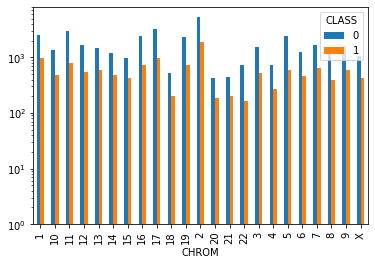

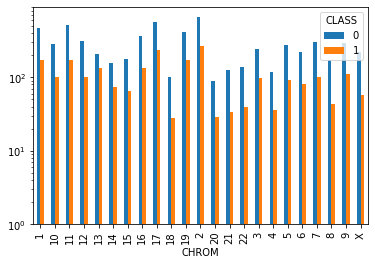

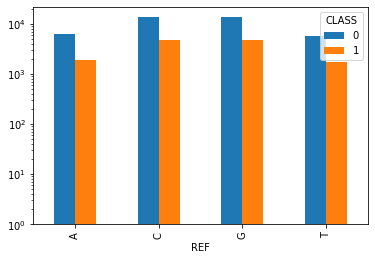

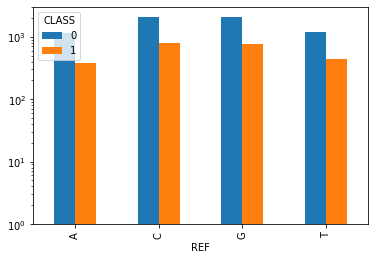

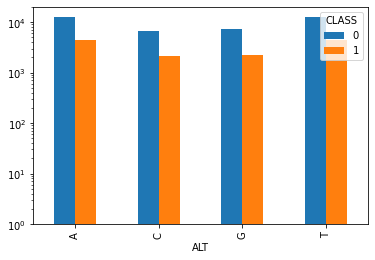

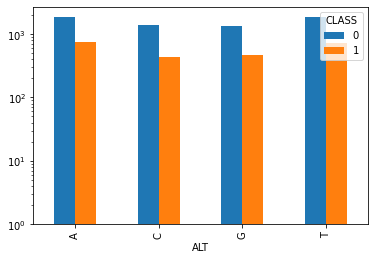

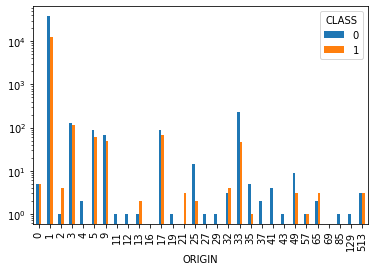

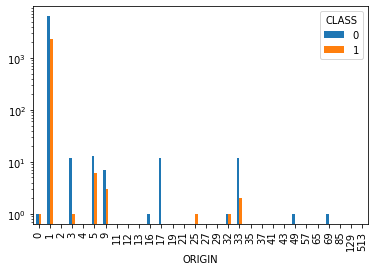

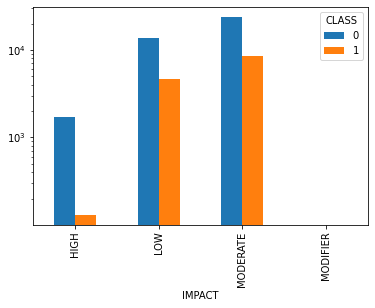

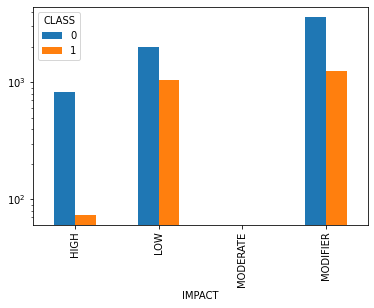

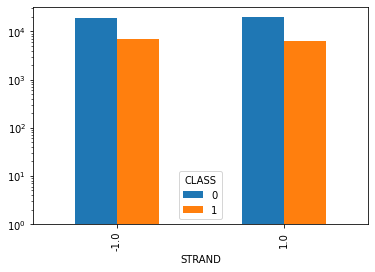

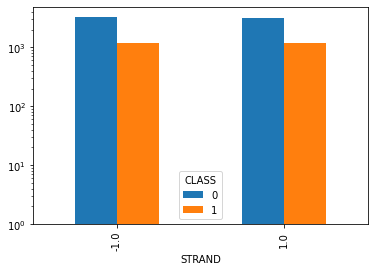

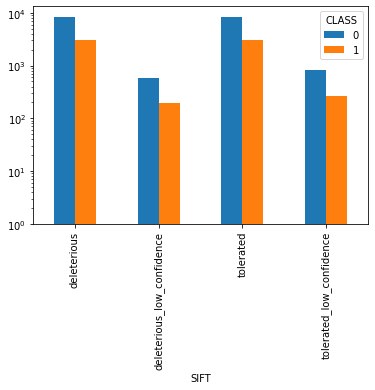

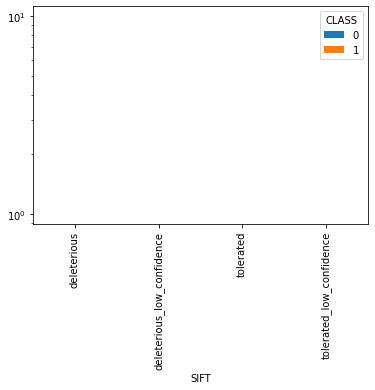

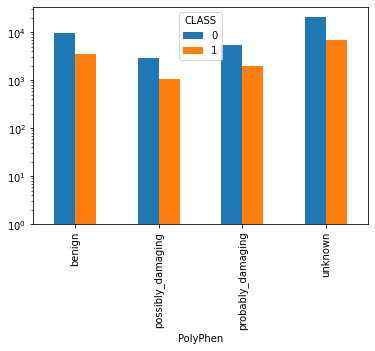

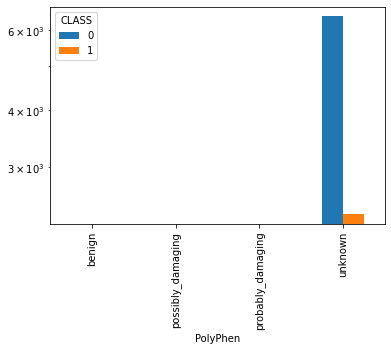

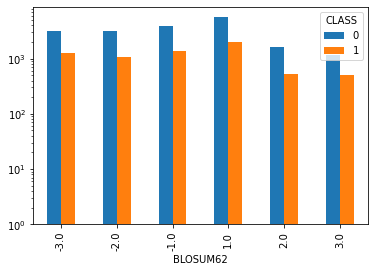

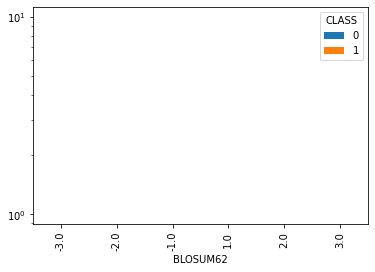

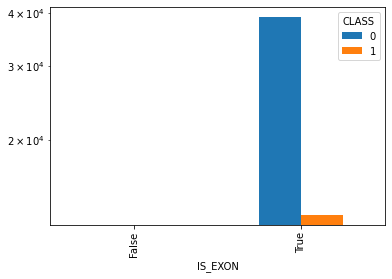

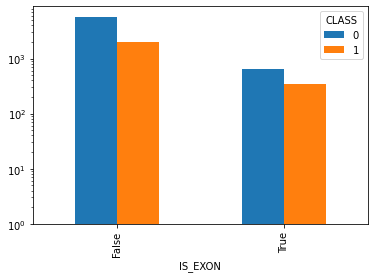

In [8]:
class_data = ['CHROM', 'REF', 'ALT', 'ORIGIN', 'IMPACT', 'STRAND', 'SIFT', 'PolyPhen', 'BLOSUM62', 'IS_EXON']

data[class_data] = data[class_data].astype('category')

for column in class_data:
    data[~ data["Amino_acids"].isna()][[column, "CLASS"]].groupby([column, "CLASS"]).size().unstack().plot(kind='bar', log=True).get_figure()
    data[data["Amino_acids"].isna()][[column, "CLASS"]].groupby([column, "CLASS"]).size().unstack().plot(kind='bar', log=True).get_figure()

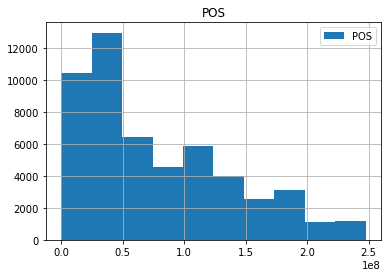

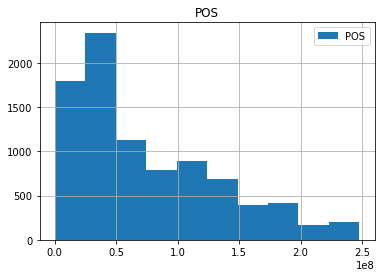

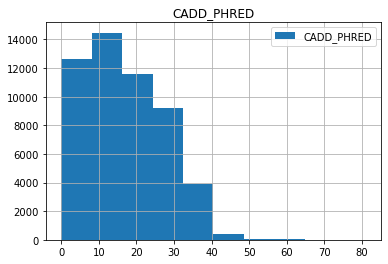

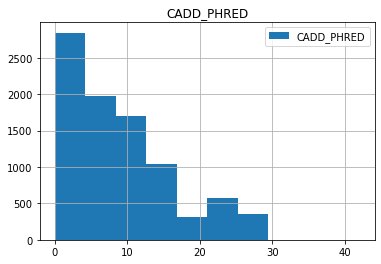

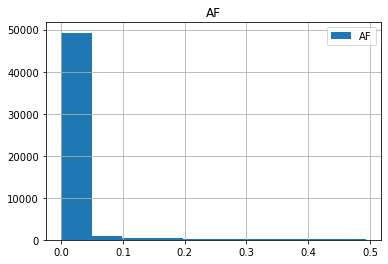

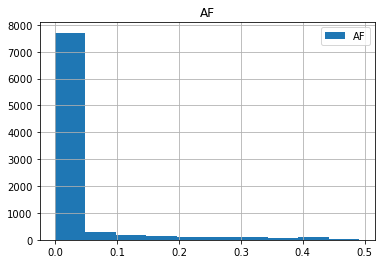

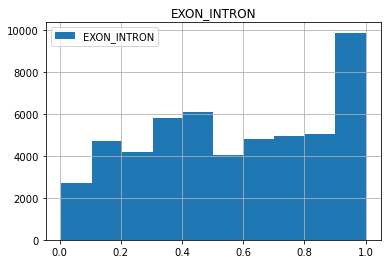

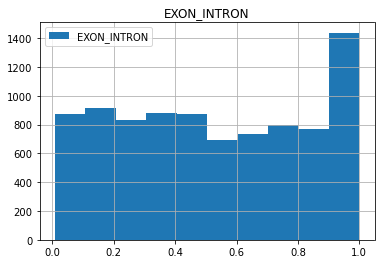

In [9]:
numerical_class = ["POS", "CADD_PHRED", "AF", "EXON_INTRON"]

for column in numerical_class:
    data[~ data["Amino_acids"].isna()][[column]].hist(legend= True)
    data[data["Amino_acids"].isna()][[column]].hist(legend= True)

Vemos que las filas que tienen aminoácidos tienen información exclusivamente de las regiones codificantes, en cambio, las filas que no tienen aminoácidos pertenecen a ambas categorías exones e intrones. La mayor parte pertenece a intrones y solo 1000 resultados a zonas de exones. Como parecen casos muy aislados vamos a eliminar estos 1000 resultados.

In [10]:
data[data["Amino_acids"].isna()][["CHROM","CLASS", "IS_EXON"]].groupby(["CLASS","IS_EXON"]).count()

CHROM
CLASS IS_EXON       
0     False     5799
      True       635
1     False     2020
      True       346

In [11]:
null_amino = data["Amino_acids"].isna() 
exon_amino = data["IS_EXON"] == True
data[null_amino & exon_amino]

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,BLOSUM62,Amino_acids_target,AF,IS_EXON,EXON_INTRON
1687,5,118788316,G,A,"['Bifunctional_peroxisomal_enzyme_deficiency',...",1,0,"['5_prime_UTR_variant', 'missense_variant']",MODIFIER,HSD17B4,NM_001199291.1,NaN,NaN,1.0,NaN,unknown,0.23300,16.790,NaN,NaN,0.0002,True,0.040000
1869,6,41126655,A,G,['Polycystic_lipomembranous_osteodysplasia_wit...,1,0,"['3_prime_UTR_variant', 'missense_variant', 'i...",MODIFIER,TREM2,XM_005249185.1,NaN,NaN,-1.0,NaN,unknown,0.83800,0.021,NaN,NaN,0.0404,True,0.800000
2711,9,130698029,G,C,"['Congenital_disorder_of_glycosylation', 'not_...",1,0,"['3_prime_UTR_variant', 'missense_variant']",MODIFIER,DPM2,XM_005252293.1,NaN,NaN,-1.0,NaN,unknown,0.65600,0.133,NaN,NaN,0.0000,True,1.000000
4648,17,7123352,C,T,"['Very_long_chain_acyl', 'CoA_dehydrogenase_de...",1,0,"['5_prime_UTR_variant', 'missense_variant', 'i...",MODIFIER,DLG4,NM_001365.3,NaN,NaN,-1.0,NaN,unknown,0.42400,14.980,NaN,NaN,0.0212,True,0.045455
4990,17,42979917,A,C,"['Ciliary_dyskinesia', 'Kartagener_syndrome', ...",1,0,"['5_prime_UTR_variant', 'missense_variant', '3...",MODIFIER,CCDC103,XM_005257352.1,NaN,NaN,1.0,NaN,unknown,0.56200,15.160,NaN,NaN,0.0010,True,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64885,X,153295804,C,T,"['Rett_syndrome', 'not_specified']",1,1,['3_prime_UTR_variant'],MODIFIER,MECP2,NM_001110792.1,NaN,NaN,-1.0,NaN,unknown,0.00365,8.144,NaN,NaN,0.0005,True,1.000000
64886,X,153295809,C,T,['not_specified'],17,0,['3_prime_UTR_variant'],MODIFIER,MECP2,NM_001110792.1,NaN,NaN,-1.0,NaN,unknown,0.00365,6.138,NaN,NaN,0.0010,True,1.000000
65173,X,153991099,C,G,"['Dyskeratosis_congenita_X', 'linked', 'not_sp...",1,1,['5_prime_UTR_variant'],MODIFIER,DKC1,NM_001363.3,NaN,NaN,1.0,NaN,unknown,NaN,6.581,NaN,NaN,0.0000,True,0.066667
65180,X,154005148,G,A,['not_specified'],1,0,['3_prime_UTR_variant'],MODIFIER,DKC1,NM_001363.3,NaN,NaN,1.0,NaN,unknown,NaN,6.255,NaN,NaN,0.1383,True,1.000000


In [12]:
data[~(null_amino & exon_amino)]

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,BLOSUM62,Amino_acids_target,AF,IS_EXON,EXON_INTRON
0,1,1168180,G,C,['not_specified'],1,0,['missense_variant'],MODERATE,B3GALT6,NM_080605.3,0.033481,E,1.0,tolerated,benign,NaN,1.053,2.0,D,0.10020,True,1.000000
1,1,1470752,G,A,"['Spinocerebellar_ataxia_21', 'not_provided']",1,0,['missense_variant'],MODERATE,TMEM240,NM_001114748.1,0.032646,P,-1.0,deleterious_low_confidence,benign,NaN,31.000,-3.0,L,0.00000,True,1.000000
2,1,1737942,A,G,"['Strabismus', 'Nystagmus', 'Hypothyroidism', ...",35,1,"['missense_variant', '5_prime_UTR_variant']",MODERATE,GNB1,NM_002074.4,0.015295,I,-1.0,deleterious,probably_damaging,NaN,28.100,-1.0,T,0.00000,True,0.500000
3,1,2160305,G,A,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,NaN,unknown,NaN,22.500,NaN,S,0.00000,True,0.142857
4,1,2160305,G,T,"['Shprintzen', 'Goldberg_syndrome']",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,NaN,unknown,NaN,24.700,-3.0,C,0.00000,True,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,"['Hereditary_factor_VIII_deficiency_disease', ...",1,0,['synonymous_variant'],LOW,F8,NM_000132.3,0.354794,S,-1.0,NaN,unknown,0.00158,0.105,NaN,*,0.13923,True,0.538462
65184,X,154159118,C,T,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,1,['missense_variant'],MODERATE,F8,NM_000132.3,0.270573,V,-1.0,tolerated,benign,0.00158,0.002,3.0,I,0.00130,True,0.538462
65185,X,154194886,C,T,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,0,['synonymous_variant'],LOW,F8,NM_000132.3,0.099651,A,-1.0,NaN,unknown,0.00158,12.850,NaN,*,0.01110,True,0.307692
65186,X,154490187,T,C,"['Non', 'syndromic_X', 'linked_intellectual_di...",1,0,['synonymous_variant'],LOW,RAB39B,NM_171998.2,0.049780,T,-1.0,NaN,unknown,NaN,0.130,NaN,*,0.00030,True,1.000000


In [13]:
data = data[~(null_amino & exon_amino)]

Vamos a proseguir con la variable LoFtool.

<AxesSubplot:>

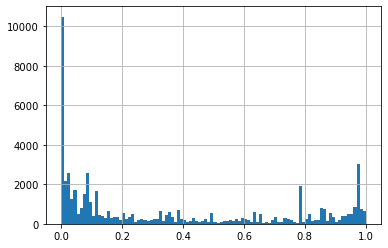

In [14]:
data["LoFtool"].hist(bins=100)

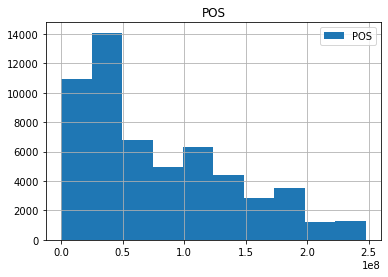

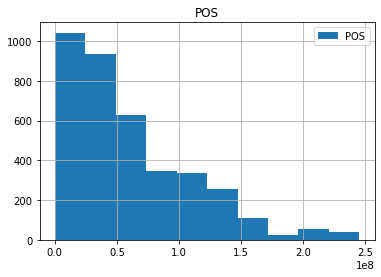

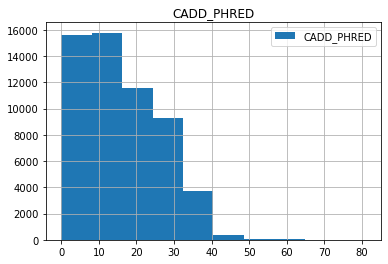

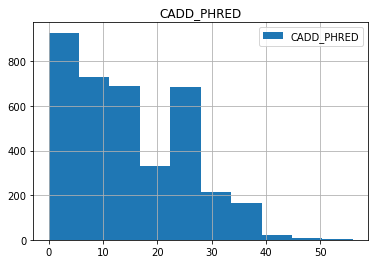

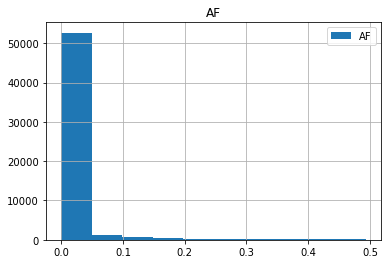

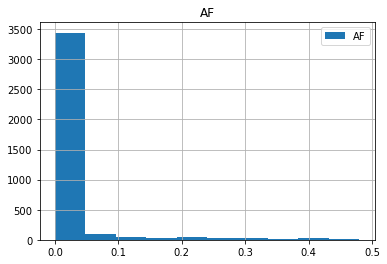

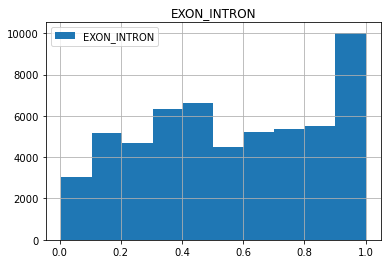

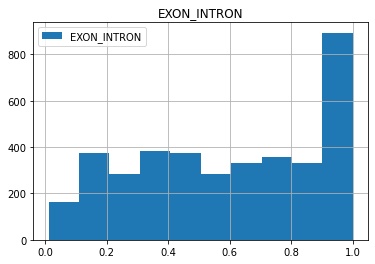

In [15]:
numerical_class = ["POS", "CADD_PHRED", "AF", "EXON_INTRON"]

for column in numerical_class:
    data[~ data["LoFtool"].isna()][[column]].hist(legend= True)
    data[data["LoFtool"].isna()][[column]].hist(legend= True)

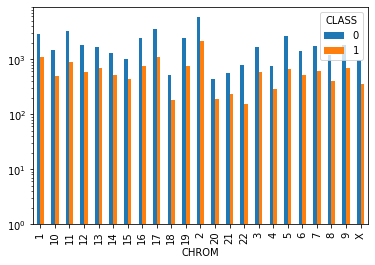

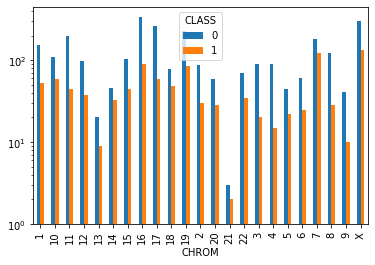

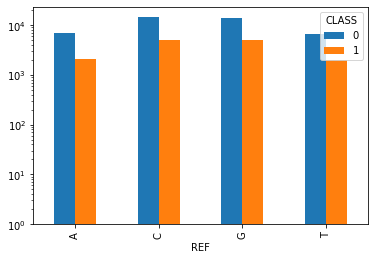

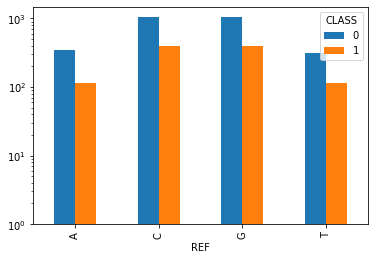

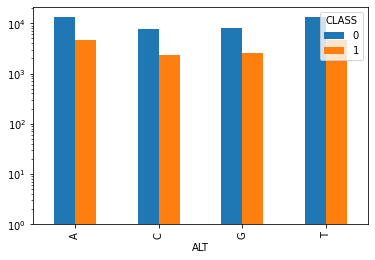

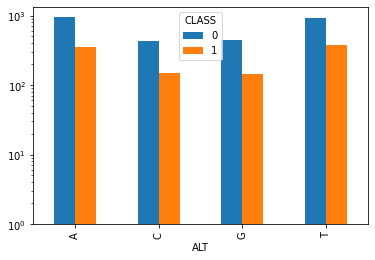

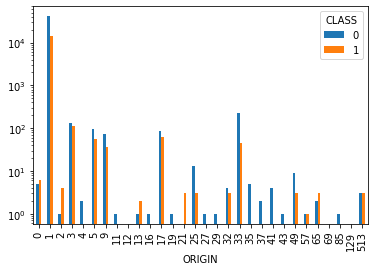

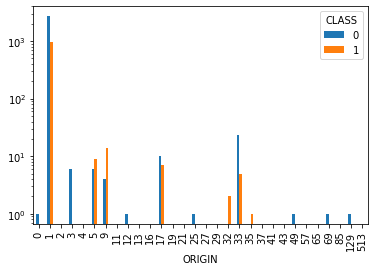

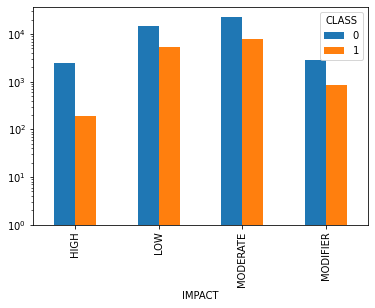

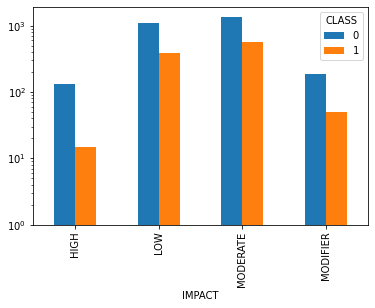

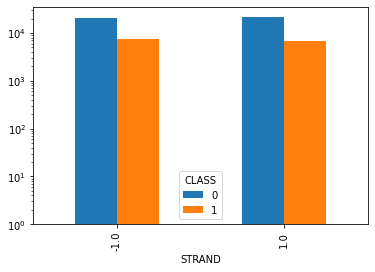

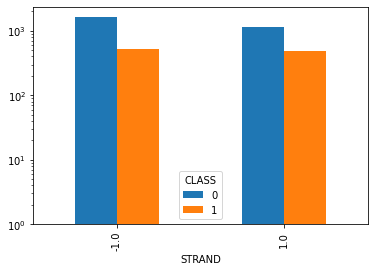

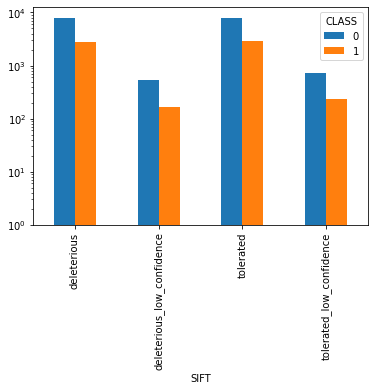

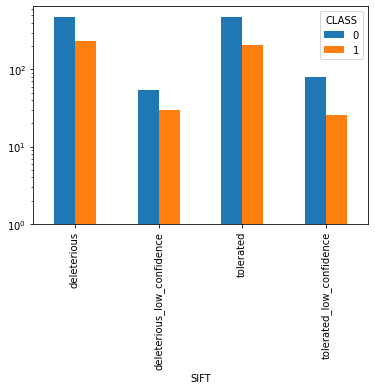

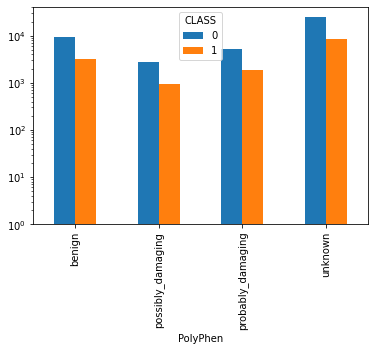

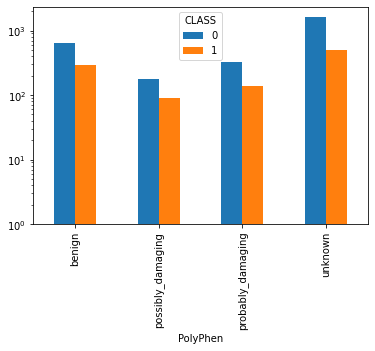

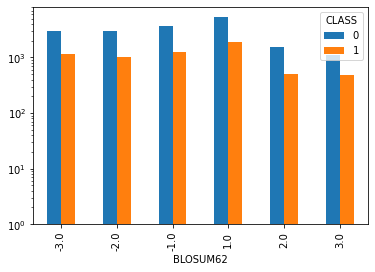

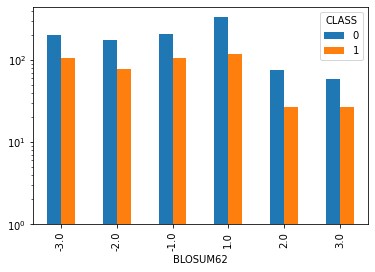

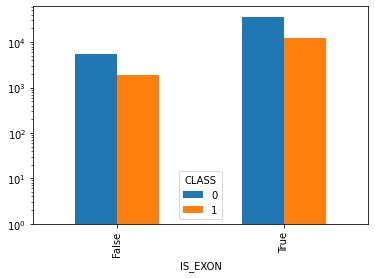

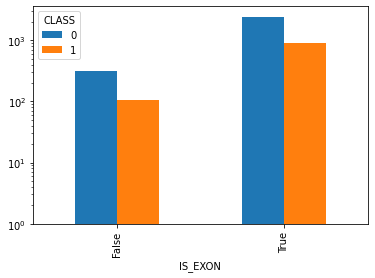

In [16]:
class_data = ['CHROM', 'REF', 'ALT', 'ORIGIN', 'IMPACT', 'STRAND', 'SIFT', 'PolyPhen', 'BLOSUM62', 'IS_EXON']

for column in class_data:
    data[~ data["LoFtool"].isna()][[column, "CLASS"]].groupby([column, "CLASS"]).size().unstack().plot(kind='bar', log=True).get_figure()
    data[data["LoFtool"].isna()][[column, "CLASS"]].groupby([column, "CLASS"]).size().unstack().plot(kind='bar', log=True).get_figure()

Parece ser un valor que falta en algunos casos, podemos intentar extrapolarlo con un modelo de regresión o mediante estadísticos.

In [17]:
ignored_columns = ["CLNDN", "Consequence", "BLOSUM62", "SIFT", "CLASS", "CDS_position"]
training_data = data.drop(columns=ignored_columns)

In [18]:
encode = ["CHROM", "REF", "ALT", "IMPACT", "SYMBOL", "Feature", "Amino_acids", "Amino_acids_target", "PolyPhen"]
training_data[encode] = training_data[encode].apply(LabelEncoder().fit_transform)
training_data

,CHROM,POS,REF,ALT,ORIGIN,IMPACT,SYMBOL,Feature,Amino_acids,STRAND,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,IS_EXON,EXON_INTRON
0,0,1168180,2,1,1,2,193,1648,4,1.0,0,NaN,1.053,3,0.10020,True,1.000000
1,0,1470752,2,0,1,2,2088,448,13,-1.0,0,NaN,31.000,10,0.00000,True,1.000000
2,0,1737942,0,2,35,2,869,823,8,-1.0,2,NaN,28.100,17,0.00000,True,0.500000
3,0,2160305,2,0,33,2,1849,1836,6,1.0,3,NaN,22.500,16,0.00000,True,0.142857
4,0,2160305,2,3,33,2,1849,1836,6,1.0,3,NaN,24.700,2,0.00000,True,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,22,154158201,3,2,1,1,687,61,16,-1.0,3,0.00158,0.105,0,0.13923,True,0.538462
65184,22,154159118,1,3,1,2,687,61,18,-1.0,0,0.00158,0.002,8,0.00130,True,0.538462
65185,22,154194886,1,3,1,1,687,61,1,-1.0,3,0.00158,12.850,0,0.01110,True,0.307692
65186,22,154490187,3,1,1,1,1672,1741,17,-1.0,3,NaN,0.130,0,0.00030,True,1.000000


In [19]:
filter_training = training_data[~training_data["LoFtool"].isna()]
filter_training = filter_training.dropna()
X = filter_training.drop(columns= ["LoFtool"])
y = filter_training["LoFtool"]

In [20]:
X , y

(       CHROM        POS  REF  ALT ORIGIN  IMPACT  SYMBOL  Feature  \
 6          0    3328358    3    1      1       2    1614     1835   
 7          0    3328659    1    3      1       2    1614     1835   
 8          0    3347452    2    0      1       2    1614     1835   
 9          0    5925304    2    0      1       2    1414     1306   
 10         0    5926503    2    0      1       2    1414     1306   
 ...      ...        ...  ...  ...    ...     ...     ...      ...   
 65182     22  154157565    1    3      1       1     687       61   
 65183     22  154158201    3    2      1       1     687       61   
 65184     22  154159118    1    3      1       2     687       61   
 65185     22  154194886    1    3      1       1     687       61   
 65187     22  154508542    2    1      1       2     397     2296   
 
        Amino_acids STRAND  PolyPhen  CADD_PHRED  Amino_acids_target       AF  \
 6               16    1.0         3       0.172                  13  0.00000

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regr  = ExtraTreesRegressor().fit(X_train,y_train)

In [22]:
mean_squared_error(regr.predict(X_test), y_test)

0.0007452599673568088

In [23]:
mean_squared_error(y_test, np.full(y_test.shape, y_test.mean()))

0.13109486757560007

In [24]:
y_test.mean()

0.3433307746787246

In [25]:
to_predict = training_data[training_data["LoFtool"].isna()].drop(columns=["LoFtool"])
predicted = regr.predict(to_predict)
to_predict["LoFtool"] = predicted
to_predict

,CHROM,POS,REF,ALT,ORIGIN,IMPACT,SYMBOL,Feature,Amino_acids,STRAND,PolyPhen,CADD_PHRED,Amino_acids_target,AF,IS_EXON,EXON_INTRON,LoFtool
0,0,1168180,2,1,1,2,193,1648,4,1.0,0,1.053,3,0.10020,True,1.000000,0.321582
1,0,1470752,2,0,1,2,2088,448,13,-1.0,0,31.000,10,0.00000,True,1.000000,0.313746
2,0,1737942,0,2,35,2,869,823,8,-1.0,2,28.100,17,0.00000,True,0.500000,0.410389
3,0,2160305,2,0,33,2,1849,1836,6,1.0,3,22.500,16,0.00000,True,0.142857,0.217631
4,0,2160305,2,3,33,2,1849,1836,6,1.0,3,24.700,2,0.00000,True,0.142857,0.217631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65174,22,153994596,2,3,1,1,550,761,17,1.0,3,10.620,0,0.00000,True,0.333333,0.360416
65175,22,153995295,1,3,1,2,550,761,15,1.0,2,25.900,19,0.00000,True,0.400000,0.319272
65176,22,153997446,0,1,1,2,550,761,7,1.0,0,23.100,13,0.00000,True,0.600000,0.313984
65177,22,154004584,1,3,1,1,550,761,1,1.0,3,14.260,0,0.08085,True,0.933333,0.331921


In [26]:
data["LoFtool"] = data["LoFtool"].fillna(to_predict["LoFtool"])
data

<ipython-input-26-a4022f372099>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["LoFtool"] = data["LoFtool"].fillna(to_predict["LoFtool"])


,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,BLOSUM62,Amino_acids_target,AF,IS_EXON,EXON_INTRON
0,1,1168180,G,C,['not_specified'],1,0,['missense_variant'],MODERATE,B3GALT6,NM_080605.3,0.033481,E,1.0,tolerated,benign,0.321582,1.053,2.0,D,0.10020,True,1.000000
1,1,1470752,G,A,"['Spinocerebellar_ataxia_21', 'not_provided']",1,0,['missense_variant'],MODERATE,TMEM240,NM_001114748.1,0.032646,P,-1.0,deleterious_low_confidence,benign,0.313746,31.000,-3.0,L,0.00000,True,1.000000
2,1,1737942,A,G,"['Strabismus', 'Nystagmus', 'Hypothyroidism', ...",35,1,"['missense_variant', '5_prime_UTR_variant']",MODERATE,GNB1,NM_002074.4,0.015295,I,-1.0,deleterious,probably_damaging,0.410389,28.100,-1.0,T,0.00000,True,0.500000
3,1,2160305,G,A,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,NaN,unknown,0.217631,22.500,NaN,S,0.00000,True,0.142857
4,1,2160305,G,T,"['Shprintzen', 'Goldberg_syndrome']",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,NaN,unknown,0.217631,24.700,-3.0,C,0.00000,True,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,"['Hereditary_factor_VIII_deficiency_disease', ...",1,0,['synonymous_variant'],LOW,F8,NM_000132.3,0.354794,S,-1.0,NaN,unknown,0.001580,0.105,NaN,*,0.13923,True,0.538462
65184,X,154159118,C,T,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,1,['missense_variant'],MODERATE,F8,NM_000132.3,0.270573,V,-1.0,tolerated,benign,0.001580,0.002,3.0,I,0.00130,True,0.538462
65185,X,154194886,C,T,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,0,['synonymous_variant'],LOW,F8,NM_000132.3,0.099651,A,-1.0,NaN,unknown,0.001580,12.850,NaN,*,0.01110,True,0.307692
65186,X,154490187,T,C,"['Non', 'syndromic_X', 'linked_intellectual_di...",1,0,['synonymous_variant'],LOW,RAB39B,NM_171998.2,0.049780,T,-1.0,NaN,unknown,0.255614,0.130,NaN,*,0.00030,True,1.000000


In [27]:
data.isnull().sum().apply(lambda x: x/data.shape[0]*100)

CHROM                  0.000000
POS                    0.000000
REF                    0.000000
ALT                    0.000000
CLNDN                  0.000000
ORIGIN                 0.000000
CLASS                  0.000000
Consequence            0.000000
IMPACT                 0.000000
SYMBOL                 0.000000
Feature                0.000000
CDS_position          12.991609
Amino_acids           12.991609
STRAND                 0.000000
SIFT                  58.840243
PolyPhen               0.000000
LoFtool                0.000000
CADD_PHRED             0.000000
BLOSUM62              57.607377
Amino_acids_target    12.991609
AF                     0.000000
IS_EXON                0.000000
EXON_INTRON            0.000000
dtype: float64

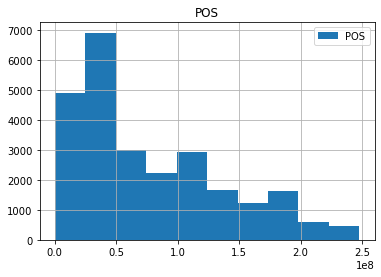

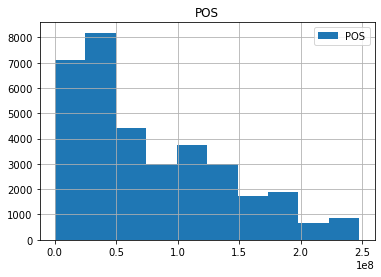

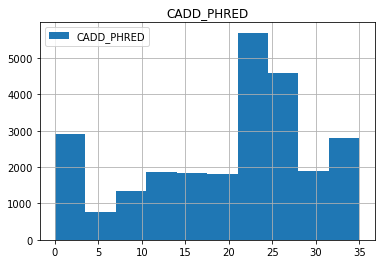

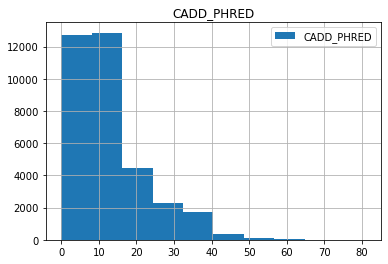

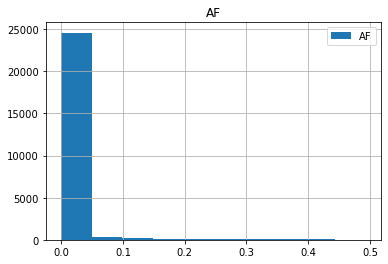

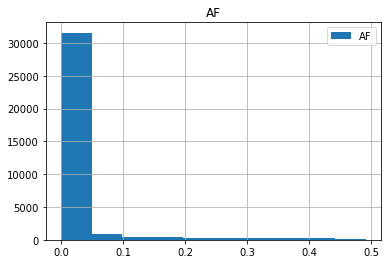

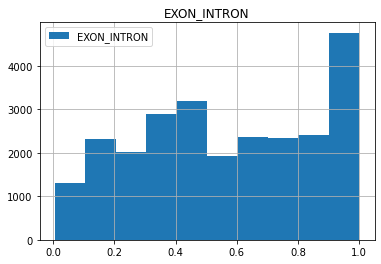

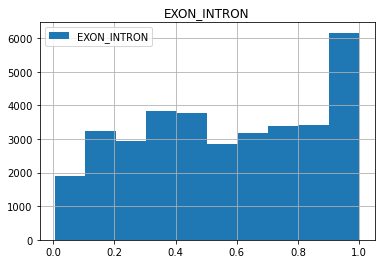

In [28]:
numerical_class = ["POS", "CADD_PHRED", "AF", "EXON_INTRON"]

for column in numerical_class:
    data[~ data["BLOSUM62"].isna()][[column]].hist(legend= True)
    data[data["BLOSUM62"].isna()][[column]].hist(legend= True)

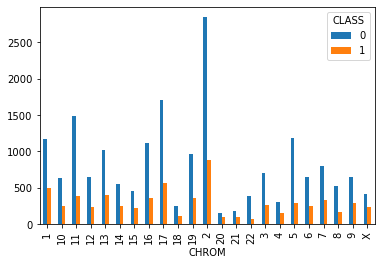

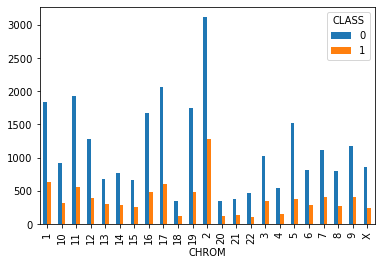

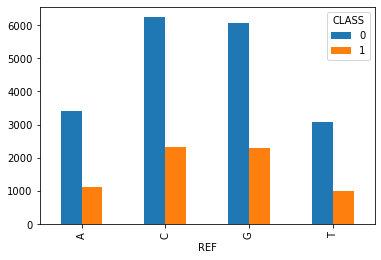

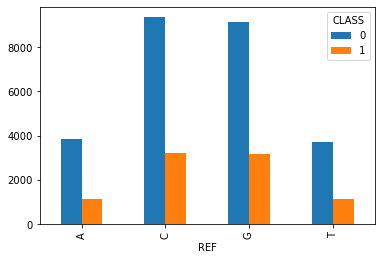

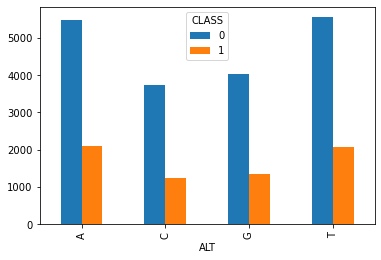

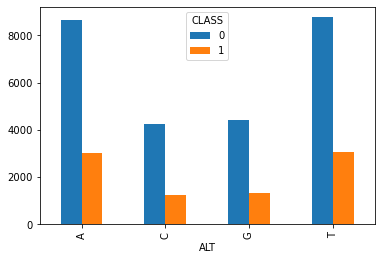

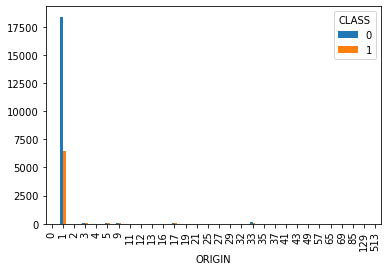

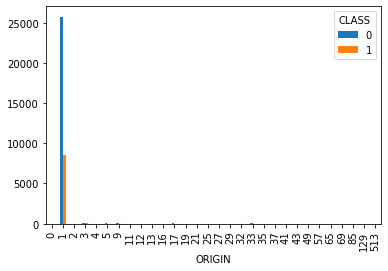

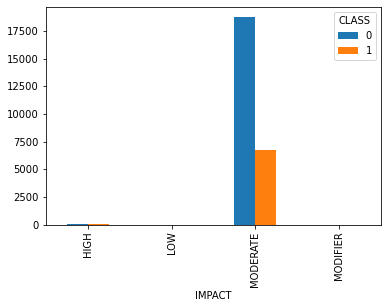

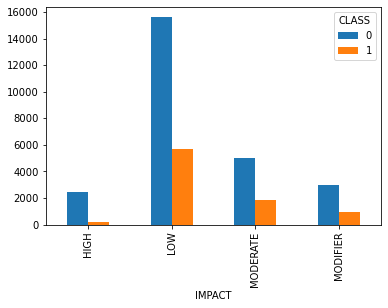

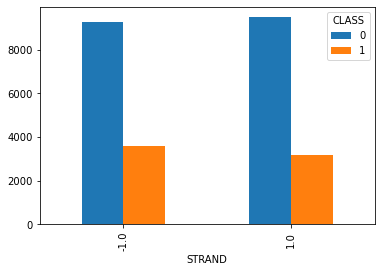

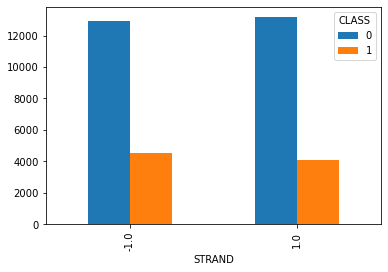

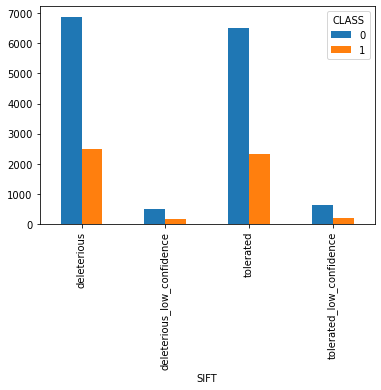

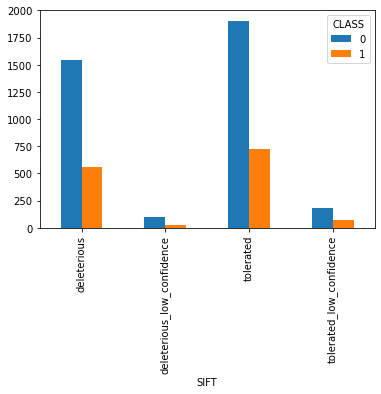

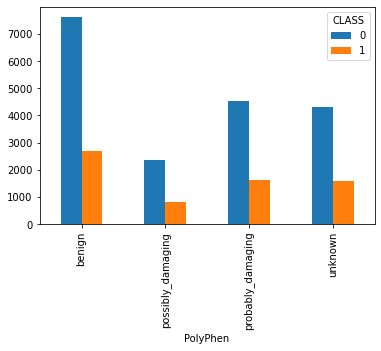

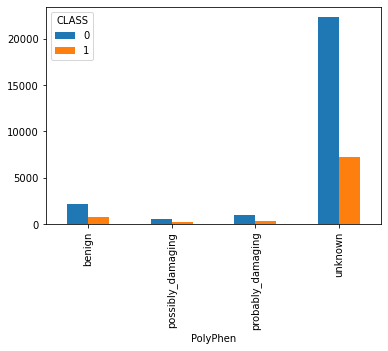

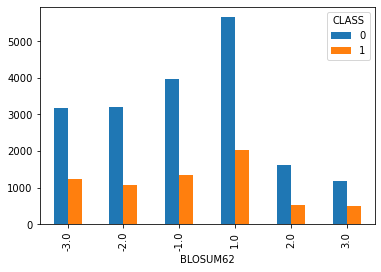

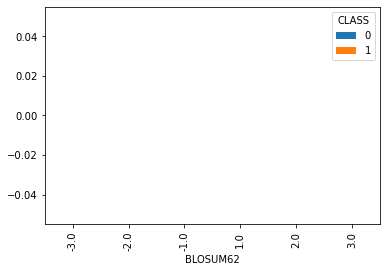

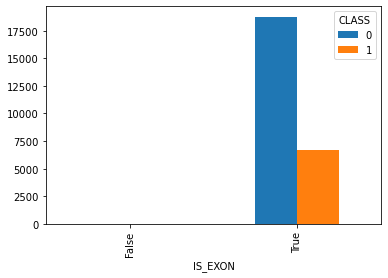

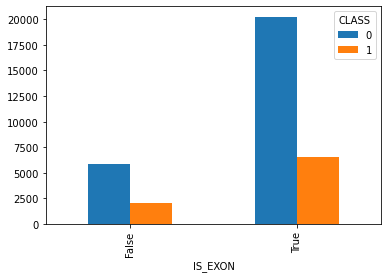

In [29]:
class_data = ['CHROM', 'REF', 'ALT', 'ORIGIN', 'IMPACT', 'STRAND', 'SIFT', 'PolyPhen', 'BLOSUM62', 'IS_EXON']

for column in class_data:
    data[~ data["BLOSUM62"].isna()][[column, "CLASS"]].groupby([column, "CLASS"]).size().unstack().plot(kind='bar').get_figure()
    data[data["BLOSUM62"].isna()][[column, "CLASS"]].groupby([column, "CLASS"]).size().unstack().plot(kind='bar').get_figure()

In [30]:
from bloodsum import blosum62

In [31]:
data["Amino_acids_target"].unique()

array(['D', 'L', 'T', 'S', 'C', 'R', 'P', 'M', 'W', 'V', 'H', 'Q', 'I',
       'K', 'G', 'Y', 'E', 'F', 'A', 'N', nan, '*'], dtype=object)

In [32]:
data["Amino_acids"].unique()

array(['E', 'P', 'I', 'G', 'S', 'V', 'T', 'R', 'A', 'F', 'H', 'D', 'L',
       'W', 'K', 'Q', 'M', 'C', 'N', 'Y', nan, '*'], dtype=object)

In [33]:
blosum = data.apply(lambda row: blosum62(row["Amino_acids"], row["Amino_acids_target"]), axis=1).dropna()

In [34]:
data["BLOSUM"] = blosum

<ipython-input-34-12fce21f1563>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["BLOSUM"] = blosum


In [35]:
 data[~ blosum.eq(data["BLOSUM62"])].head(50)

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,BLOSUM62,Amino_acids_target,AF,IS_EXON,EXON_INTRON,BLOSUM
3,1,2160305,G,A,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,NaN,unknown,0.217631,22.500,NaN,S,0.00000,True,0.142857,0.0
11,1,5927943,G,A,"['Nephronophthisis', 'Renal_dysplasia_and_reti...",1,1,['missense_variant'],MODERATE,NPHP4,NM_015102.3,0.213868,A,-1.0,tolerated,benign,0.021000,6.773,NaN,V,0.00359,True,0.800000,0.0
12,1,5935096,C,T,"['Nephronophthisis', 'not_specified']",1,0,['missense_variant'],MODERATE,NPHP4,NM_015102.3,0.185142,R,-1.0,tolerated,possibly_damaging,0.021000,22.200,NaN,H,0.00233,True,0.700000,0.0
17,1,5951013,C,T,"['Nephronophthisis', 'Renal_dysplasia_and_reti...",1,0,['missense_variant'],MODERATE,NPHP4,NM_015102.3,0.142536,R,-1.0,tolerated,benign,0.021000,2.552,NaN,H,0.02420,True,0.566667,0.0
20,1,5965824,G,C,"['Nephronophthisis', 'Renal_dysplasia_and_reti...",1,0,['missense_variant'],MODERATE,NPHP4,NM_015102.3,0.104749,A,-1.0,tolerated,benign,0.021000,0.188,NaN,G,0.02540,True,0.466667,0.0
23,1,6038338,A,G,['not_specified'],1,0,"['missense_variant', '5_prime_UTR_variant', 'i...",MODERATE,NPHP4,NM_015102.3,0.017351,F,-1.0,tolerated,benign,0.021000,22.200,NaN,L,0.00130,True,0.100000,0.0
25,1,8418302,G,T,['Neurodevelopmental_disorder_with_or_without_...,33,0,['missense_variant'],MODERATE,RERE,XM_005263464.1,0.275818,H,-1.0,deleterious_low_confidence,probably_damaging,0.067400,22.900,NaN,Q,0.00000,True,0.869565,0.0
30,1,11082325,G,A,"['Motor_neuron_disease', 'Amyotrophic_lateral_...",1,1,['missense_variant'],MODERATE,TARDBP,NM_007375.3,0.055138,G,1.0,tolerated,benign,0.383243,22.700,NaN,S,0.00000,True,1.000000,0.0
35,1,11855182,C,T,"['Homocysteinemia_due_to_MTHFR_deficiency', 'N...",1,1,['missense_variant'],MODERATE,MTHFR,NM_001330358.1,0.072360,R,-1.0,tolerated,possibly_damaging,0.210000,27.400,NaN,H,0.00005,True,0.500000,0.0
36,1,12009911,G,A,"['Ehlers', 'Danlos_syndrome', '_hydroxylysine'...",1,0,['missense_variant'],MODERATE,PLOD1,NM_001316320.1,0.025063,A,1.0,deleterious,possibly_damaging,0.378000,23.100,NaN,T,0.02740,True,0.200000,0.0


In [36]:
data["BLOSUM62"].unique()

C:\Users\angel\anaconda3\envs\genetic_variants\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


[2.0, -3.0, -1.0, NaN, -2.0, 1.0, 3.0]
Categories (6, float64): [-3.0, -2.0, -1.0, 1.0, 2.0, 3.0]

In [37]:
 data[~ blosum.eq(data["BLOSUM62"])]["BLOSUM62"].unique()

[NaN]
Categories (6, float64): [-3.0, -2.0, -1.0, 1.0, 2.0, 3.0]

In [38]:
 data[~ blosum.eq(data["BLOSUM62"])].dropna()

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,BLOSUM62,Amino_acids_target,AF,IS_EXON,EXON_INTRON,BLOSUM


Parece ser que por un error el BLOSUM de 0 se ha tenido en cuenta como un Not a Number.

In [39]:
data.isnull().sum().apply(lambda x: x/data.shape[0]*100)

CHROM                  0.000000
POS                    0.000000
REF                    0.000000
ALT                    0.000000
CLNDN                  0.000000
ORIGIN                 0.000000
CLASS                  0.000000
Consequence            0.000000
IMPACT                 0.000000
SYMBOL                 0.000000
Feature                0.000000
CDS_position          12.991609
Amino_acids           12.991609
STRAND                 0.000000
SIFT                  58.840243
PolyPhen               0.000000
LoFtool                0.000000
CADD_PHRED             0.000000
BLOSUM62              57.607377
Amino_acids_target    12.991609
AF                     0.000000
IS_EXON                0.000000
EXON_INTRON            0.000000
BLOSUM                46.207527
dtype: float64

In [40]:
data[data["BLOSUM"].isna() & ~ data["Amino_acids_target"].isna() & data["Amino_acids_target"] != 'None']

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,BLOSUM62,Amino_acids_target,AF,IS_EXON,EXON_INTRON,BLOSUM
0,1,1168180,G,C,['not_specified'],1,0,['missense_variant'],MODERATE,B3GALT6,NM_080605.3,0.033481,E,1.0,tolerated,benign,0.321582,1.053,2.0,D,0.10020,True,1.000000,2.0
1,1,1470752,G,A,"['Spinocerebellar_ataxia_21', 'not_provided']",1,0,['missense_variant'],MODERATE,TMEM240,NM_001114748.1,0.032646,P,-1.0,deleterious_low_confidence,benign,0.313746,31.000,-3.0,L,0.00000,True,1.000000,-3.0
2,1,1737942,A,G,"['Strabismus', 'Nystagmus', 'Hypothyroidism', ...",35,1,"['missense_variant', '5_prime_UTR_variant']",MODERATE,GNB1,NM_002074.4,0.015295,I,-1.0,deleterious,probably_damaging,0.410389,28.100,-1.0,T,0.00000,True,0.500000,-1.0
3,1,2160305,G,A,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,NaN,unknown,0.217631,22.500,NaN,S,0.00000,True,0.142857,0.0
4,1,2160305,G,T,"['Shprintzen', 'Goldberg_syndrome']",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,NaN,unknown,0.217631,24.700,-3.0,C,0.00000,True,0.142857,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,"['Hereditary_factor_VIII_deficiency_disease', ...",1,0,['synonymous_variant'],LOW,F8,NM_000132.3,0.354794,S,-1.0,NaN,unknown,0.001580,0.105,NaN,*,0.13923,True,0.538462,NaN
65184,X,154159118,C,T,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,1,['missense_variant'],MODERATE,F8,NM_000132.3,0.270573,V,-1.0,tolerated,benign,0.001580,0.002,3.0,I,0.00130,True,0.538462,3.0
65185,X,154194886,C,T,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,0,['synonymous_variant'],LOW,F8,NM_000132.3,0.099651,A,-1.0,NaN,unknown,0.001580,12.850,NaN,*,0.01110,True,0.307692,NaN
65186,X,154490187,T,C,"['Non', 'syndromic_X', 'linked_intellectual_di...",1,0,['synonymous_variant'],LOW,RAB39B,NM_171998.2,0.049780,T,-1.0,NaN,unknown,0.255614,0.130,NaN,*,0.00030,True,1.000000,NaN


In [41]:
data = data.drop(columns = ["BLOSUM62"]) 
data["BLOSUM"] = data["BLOSUM"].astype('category')
data

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,IS_EXON,EXON_INTRON,BLOSUM
0,1,1168180,G,C,['not_specified'],1,0,['missense_variant'],MODERATE,B3GALT6,NM_080605.3,0.033481,E,1.0,tolerated,benign,0.321582,1.053,D,0.10020,True,1.000000,2.0
1,1,1470752,G,A,"['Spinocerebellar_ataxia_21', 'not_provided']",1,0,['missense_variant'],MODERATE,TMEM240,NM_001114748.1,0.032646,P,-1.0,deleterious_low_confidence,benign,0.313746,31.000,L,0.00000,True,1.000000,-3.0
2,1,1737942,A,G,"['Strabismus', 'Nystagmus', 'Hypothyroidism', ...",35,1,"['missense_variant', '5_prime_UTR_variant']",MODERATE,GNB1,NM_002074.4,0.015295,I,-1.0,deleterious,probably_damaging,0.410389,28.100,T,0.00000,True,0.500000,-1.0
3,1,2160305,G,A,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,NaN,unknown,0.217631,22.500,S,0.00000,True,0.142857,0.0
4,1,2160305,G,T,"['Shprintzen', 'Goldberg_syndrome']",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,NaN,unknown,0.217631,24.700,C,0.00000,True,0.142857,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,"['Hereditary_factor_VIII_deficiency_disease', ...",1,0,['synonymous_variant'],LOW,F8,NM_000132.3,0.354794,S,-1.0,NaN,unknown,0.001580,0.105,*,0.13923,True,0.538462,NaN
65184,X,154159118,C,T,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,1,['missense_variant'],MODERATE,F8,NM_000132.3,0.270573,V,-1.0,tolerated,benign,0.001580,0.002,I,0.00130,True,0.538462,3.0
65185,X,154194886,C,T,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,0,['synonymous_variant'],LOW,F8,NM_000132.3,0.099651,A,-1.0,NaN,unknown,0.001580,12.850,*,0.01110,True,0.307692,NaN
65186,X,154490187,T,C,"['Non', 'syndromic_X', 'linked_intellectual_di...",1,0,['synonymous_variant'],LOW,RAB39B,NM_171998.2,0.049780,T,-1.0,NaN,unknown,0.255614,0.130,*,0.00030,True,1.000000,NaN


Vamos a observar el comportamiento de SIFT

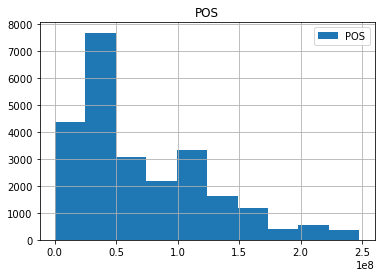

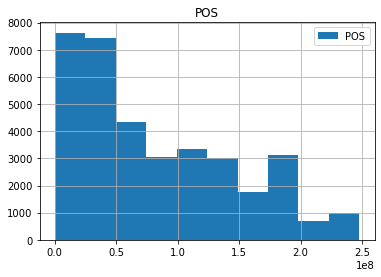

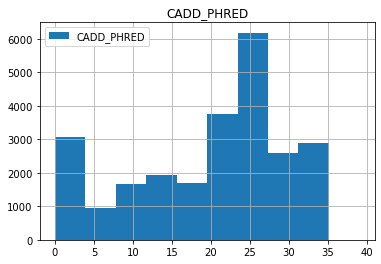

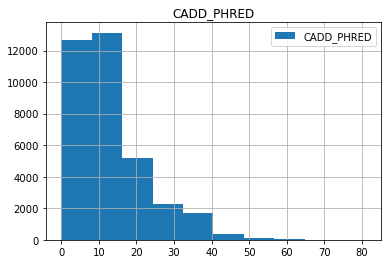

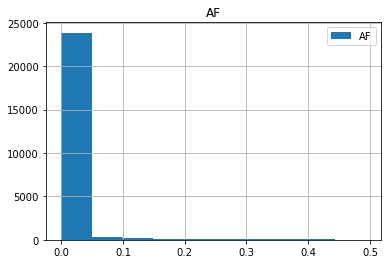

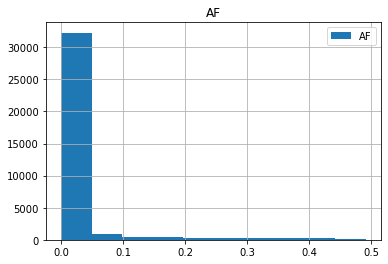

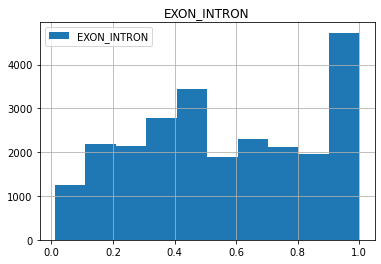

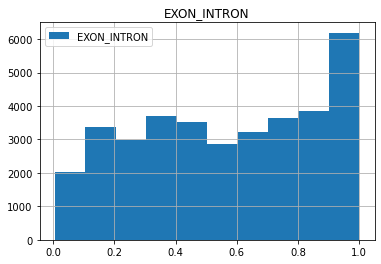

In [42]:
numerical_class = ["POS", "CADD_PHRED", "AF", "EXON_INTRON"]

for column in numerical_class:
    data[~ data["SIFT"].isna()][[column]].hist(legend= True)
    data[data["SIFT"].isna()][[column]].hist(legend= True)

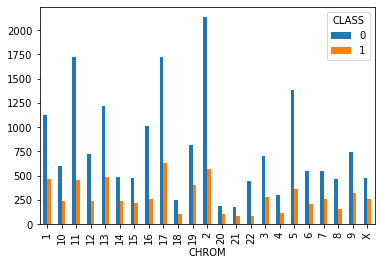

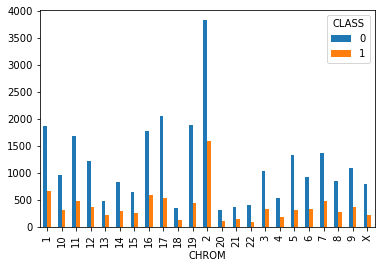

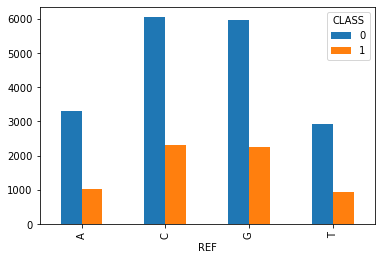

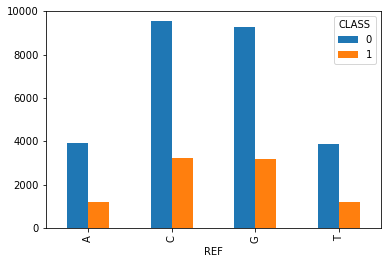

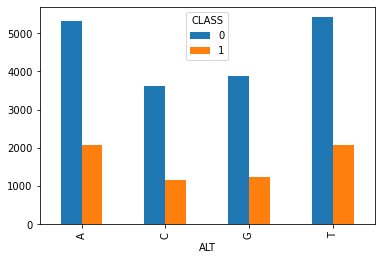

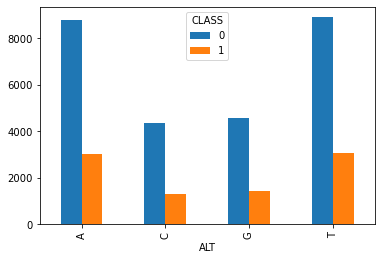

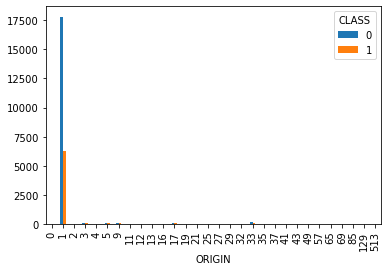

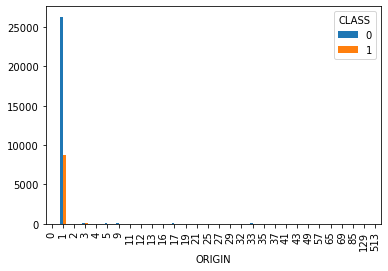

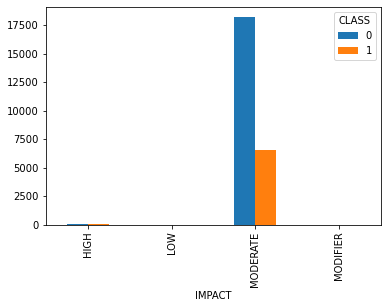

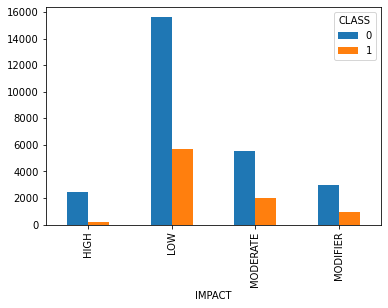

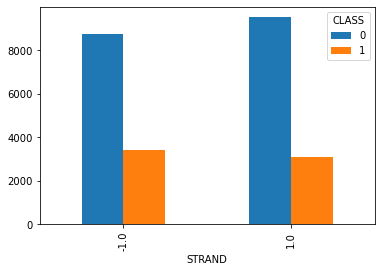

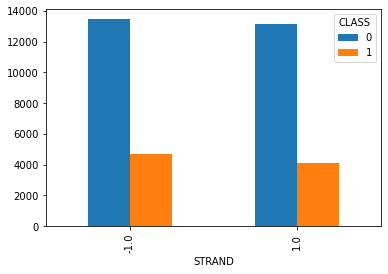

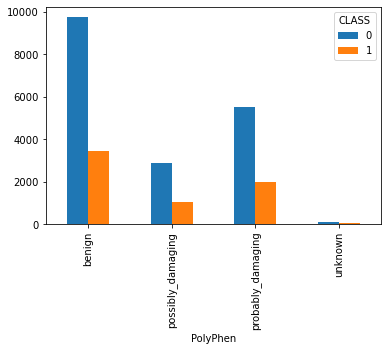

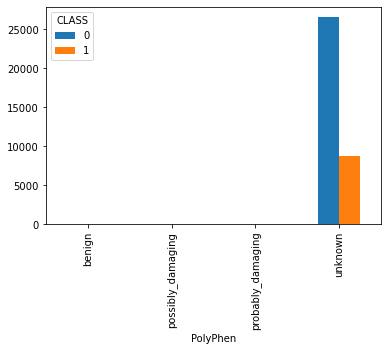

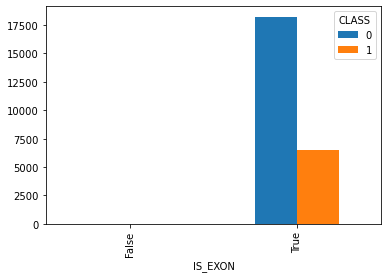

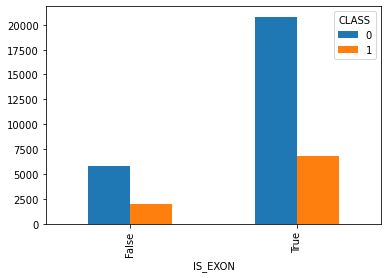

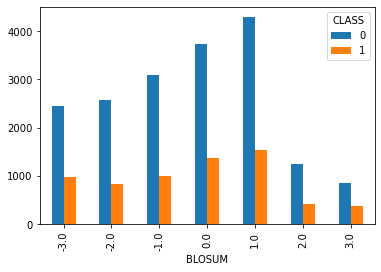

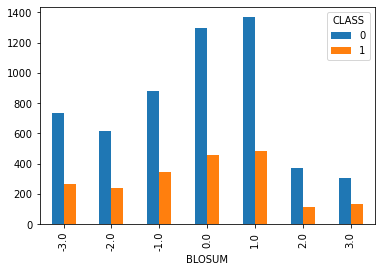

In [43]:
class_data = ['CHROM', 'REF', 'ALT', 'ORIGIN', 'IMPACT', 'STRAND', 'PolyPhen', 'IS_EXON', 'BLOSUM']

for column in class_data:
    data[~ data["SIFT"].isna()][[column, "CLASS"]].groupby([column, "CLASS"]).size().unstack().plot(kind='bar').get_figure()
    data[data["SIFT"].isna()][[column, "CLASS"]].groupby([column, "CLASS"]).size().unstack().plot(kind='bar').get_figure()

Vemos que la columnas vacías se identificaban con el fenotipo desconocido y suelen tener impactos más variados, a falta de encontrar una correlación y como la librería SIFT requiere de toda la cadena de aminoácidos, información que nos sería costosa de traer y tratar vamos a suponer una clase unknows.

In [44]:
data["SIFT"] = data["SIFT"].cat.add_categories("unknown").fillna("unknown")
data

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,IS_EXON,EXON_INTRON,BLOSUM
0,1,1168180,G,C,['not_specified'],1,0,['missense_variant'],MODERATE,B3GALT6,NM_080605.3,0.033481,E,1.0,tolerated,benign,0.321582,1.053,D,0.10020,True,1.000000,2.0
1,1,1470752,G,A,"['Spinocerebellar_ataxia_21', 'not_provided']",1,0,['missense_variant'],MODERATE,TMEM240,NM_001114748.1,0.032646,P,-1.0,deleterious_low_confidence,benign,0.313746,31.000,L,0.00000,True,1.000000,-3.0
2,1,1737942,A,G,"['Strabismus', 'Nystagmus', 'Hypothyroidism', ...",35,1,"['missense_variant', '5_prime_UTR_variant']",MODERATE,GNB1,NM_002074.4,0.015295,I,-1.0,deleterious,probably_damaging,0.410389,28.100,T,0.00000,True,0.500000,-1.0
3,1,2160305,G,A,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,unknown,unknown,0.217631,22.500,S,0.00000,True,0.142857,0.0
4,1,2160305,G,T,"['Shprintzen', 'Goldberg_syndrome']",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,unknown,unknown,0.217631,24.700,C,0.00000,True,0.142857,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,"['Hereditary_factor_VIII_deficiency_disease', ...",1,0,['synonymous_variant'],LOW,F8,NM_000132.3,0.354794,S,-1.0,unknown,unknown,0.001580,0.105,*,0.13923,True,0.538462,NaN
65184,X,154159118,C,T,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,1,['missense_variant'],MODERATE,F8,NM_000132.3,0.270573,V,-1.0,tolerated,benign,0.001580,0.002,I,0.00130,True,0.538462,3.0
65185,X,154194886,C,T,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,0,['synonymous_variant'],LOW,F8,NM_000132.3,0.099651,A,-1.0,unknown,unknown,0.001580,12.850,*,0.01110,True,0.307692,NaN
65186,X,154490187,T,C,"['Non', 'syndromic_X', 'linked_intellectual_di...",1,0,['synonymous_variant'],LOW,RAB39B,NM_171998.2,0.049780,T,-1.0,unknown,unknown,0.255614,0.130,*,0.00030,True,1.000000,NaN


In [45]:
data.to_csv('data_refined.csv')